# Logistics Regression


I implement Logistic Regression with Python and Scikit-Learn. I build a Logistic Regression classifier to predict whether or not it will rain tomorrow in Australia. I train a binary classification model using Logistic Regression.

Logistic Regression is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. 

Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.

If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

```z = β0 + β1x1```

Here, the coefficients β0 and β1 are the parameters of the model.

If there are multiple explanatory variables, then the above equation can be extended to

```z = β0 + β1x1+ β2x2+……..+ βnxn```

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

### Sigmoid Function

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, **sigmoid function is used to map predictions to probabilities**. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

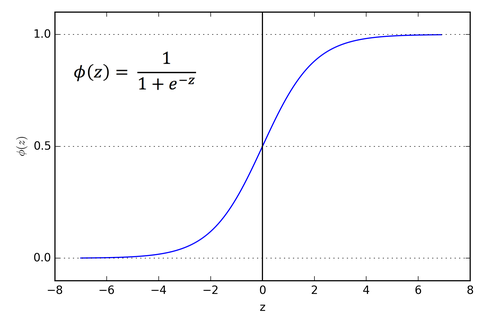

### Decision boundary

The sigmoid function **returns a probability value between 0 and 1**. This probability value is then mapped to a discrete class which is either “0” or “1”. **In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value**. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

- p ≥ 0.5 => class = 1

- p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

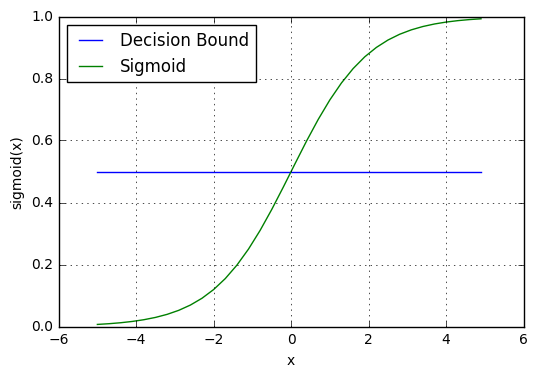

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.

### Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

### Types of Logistic Regression

Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

1. **Binary Logistic Regression** -
In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. **Multinomial Logistic Regression** -
In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. **Ordinal Logistic Regression** -
In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.

## Code part

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("data\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [46]:
df.shape

(255768, 24)

It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows-

In [47]:
df.drop(columns=["RISK_MM"], axis = 1, , inplace=True)

SyntaxError: invalid syntax (2457707011.py, line 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255768 entries, 0 to 255767
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           255768 non-null  object 
 1   Location       255768 non-null  object 
 2   MinTemp        251200 non-null  float64
 3   MaxTemp        251278 non-null  float64
 4   Rainfall       247876 non-null  float64
 5   Evaporation    110707 non-null  float64
 6   Sunshine       100342 non-null  float64
 7   WindGustDir    236837 non-null  object 
 8   WindGustSpeed  237031 non-null  float64
 9   WindDir9am     235693 non-null  object 
 10  WindDir3pm     244447 non-null  object 
 11  WindSpeed9am   250433 non-null  float64
 12  WindSpeed3pm   246090 non-null  float64
 13  Humidity9am    249726 non-null  float64
 14  Humidity3pm    244896 non-null  float64
 15  Pressure9am    227564 non-null  float64
 16  Pressure3pm    227583 non-null  float64
 17  Cloud9am       140510 non-nul

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

In [20]:
numercical_columns = [n for n in df.columns if df[n].dtype == "float64"]
categorical_columns = list(filter(lambda x: x not in numercical_columns, df.columns))
print('The numerical variables are :', numercical_columns)
print('The categorical variables are :', categorical_columns)

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [21]:
df[categorical_columns].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Summary:
- There is a date variable. It is denoted by Date column.
- There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, - - RainToday and RainTomorrow.
- There are two binary categorical variables - RainToday and RainTomorrow.
- RainTomorrow is the target variable.

In [26]:
with_null = [n for n in categorical_columns if df[n].isnull().sum() >0  ]
with_null

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [ ]:
for n in categorical_columns:
    print(df[n].value_counts(normalize=True))

2017-07-17    0.000192
2013-10-29    0.000192
2013-10-22    0.000192
2013-10-23    0.000192
2013-10-24    0.000192
                ...   
2007-11-29    0.000004
2007-11-28    0.000004
2007-11-27    0.000004
2007-11-26    0.000004
2008-01-31    0.000004
Name: Date, Length: 5751, dtype: float64
Canberra            0.022485
Sydney              0.022126
Darwin              0.021535
Hobart              0.021535
Brisbane            0.021535
Melbourne           0.021535
Perth               0.021531
Wollongong          0.020937
AliceSprings        0.020937
Launceston          0.020937
Townsville          0.020937
GoldCoast           0.020937
Cairns              0.020937
Albury              0.020937
Tuggeranong         0.020933
Albany              0.020933
MountGambier        0.020933
Penrith             0.020933
Ballarat            0.020929
Bendigo             0.020902
MountGinini         0.020890
Williamtown         0.020816
Richmond            0.020816
Cobar               0.020816
CoffsHarbo

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [29]:
for n in categorical_columns:
    print(f"Column {n} has {df[n].nunique()} labels")

Column Date has 5751 labels
Column Location has 49 labels
Column WindGustDir has 16 labels
Column WindDir9am has 16 labels
Column WindDir3pm has 16 labels
Column RainToday has 2 labels
Column RainTomorrow has 2 labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables

## Feature Engineering of Date Variable

In [30]:
df['Date'].dtypes

dtype('O')

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df['Day'] = df['Date'].dt.day

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255768 entries, 0 to 255767
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           255768 non-null  datetime64[ns]
 1   Location       255768 non-null  object        
 2   MinTemp        251200 non-null  float64       
 3   MaxTemp        251278 non-null  float64       
 4   Rainfall       247876 non-null  float64       
 5   Evaporation    110707 non-null  float64       
 6   Sunshine       100342 non-null  float64       
 7   WindGustDir    236837 non-null  object        
 8   WindGustSpeed  237031 non-null  float64       
 9   WindDir9am     235693 non-null  object        
 10  WindDir3pm     244447 non-null  object        
 11  WindSpeed9am   250433 non-null  float64       
 12  WindSpeed3pm   246090 non-null  float64       
 13  Humidity9am    249726 non-null  float64       
 14  Humidity3pm    244896 non-null  float64       
 15  

In [ ]:
df.drop(columns=["Date"], axis = 1, inplace=True)